In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
%matplotlib inline

- Reading Data
- histogram of the variables 
- Relationship with the categorical variable
- 

In [2]:
df = pd.read_csv('D:/Machine_Learning_Data/housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB73266848>,
      dtype=object)

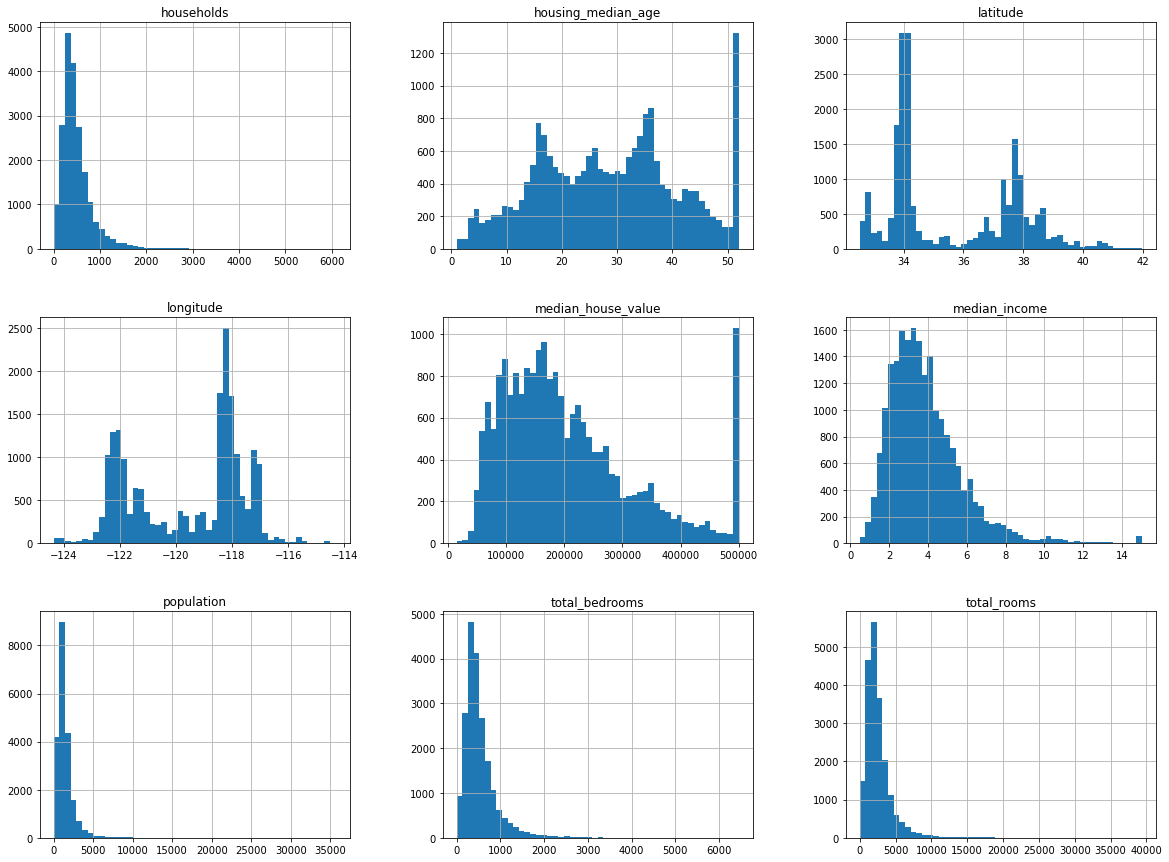

In [13]:
%matplotlib inline
df.hist(bins = 50, figsize = (20, 15))

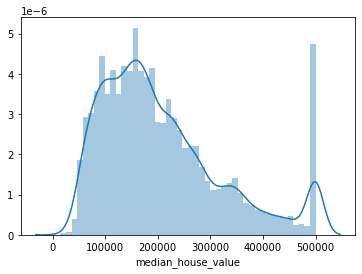

In [15]:
import seaborn as sns
sns.distplot(df['median_house_value'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

###  Relationship with categorical variable : ocean_proximity

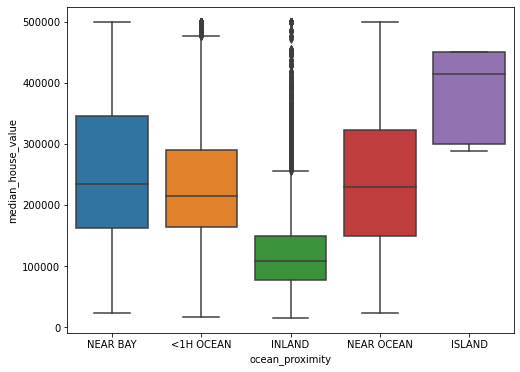

In [21]:
var = 'ocean_proximity'
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var , y = 'median_house_value', data = df)
fig.axis()

In [3]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0., 1.5, 3.0, 4.5, 6, np.inf], labels = [1,2,3,4,5])

Text(0.5, 1.0, 'Histogram of the median income categories')

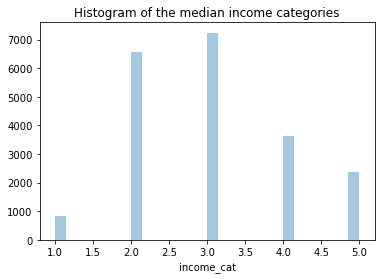

In [4]:
fig = sns.distplot(df['income_cat'], kde = False)
plt.title('Histogram of the median income categories')

###### Now we are ready to do the stratified sampling based on the income categories

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [6]:
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [7]:
#checking the propotions in the test set strat
strat_test_set['income_cat'].value_counts()/strat_test_set.shape[0]

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [8]:
# checking the proportions in the train full dataset
df['income_cat'].value_counts()/df.shape[0]

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [9]:
## now we should remove the income_cat so the dataset return to its original form

for set_ in (strat_train_set, strat_test_set):
    set_.drop(['income_cat'], axis = 1, inplace = True)

In [10]:
## create a copy of the training set
housing = strat_train_set.copy()

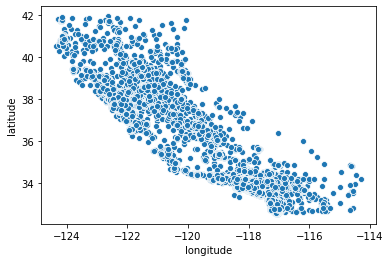

In [13]:
sns.scatterplot(x='longitude', y='latitude', data = housing)

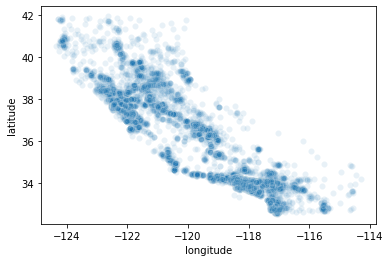

In [54]:
sns.scatterplot(x = 'longitude', y = 'latitude',data = housing , alpha = 0.1)

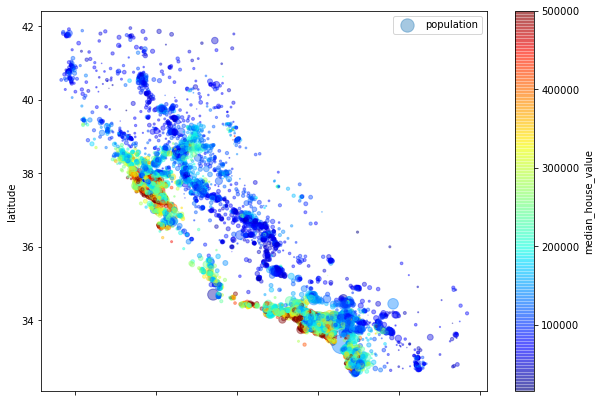

In [55]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, 
             label="population", 
             figsize=(10,7),
             c="median_house_value", # for colorbar values
             cmap=plt.get_cmap("jet"), 
             colorbar=True,)
plt.legend()

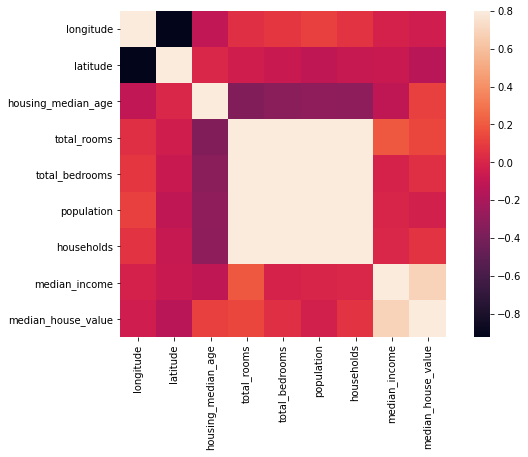

In [11]:
matcor = housing.corr()
f, ax = plt.subplots(figsize = (10,6))
hm = sns.heatmap(matcor, square = True, vmax = .8)

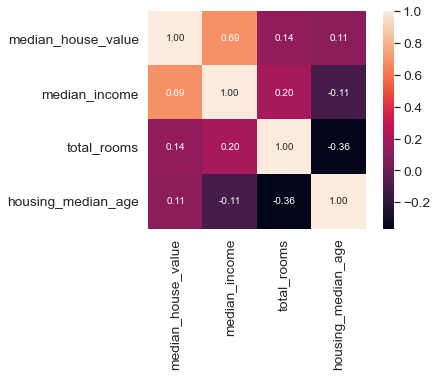

In [12]:
k = 4
cols = matcor.nlargest(k, 'median_house_value').index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot = True, cbar = True,annot_kws={'size': 10} ,square =True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


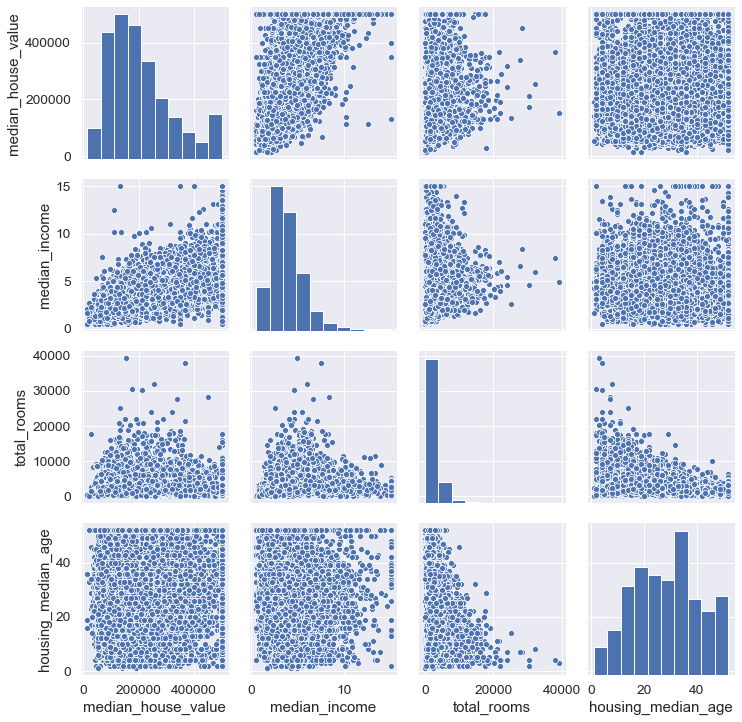

In [80]:
sns.pairplot(housing[cols], size = 2.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB78069C88>,
      dtype=object)

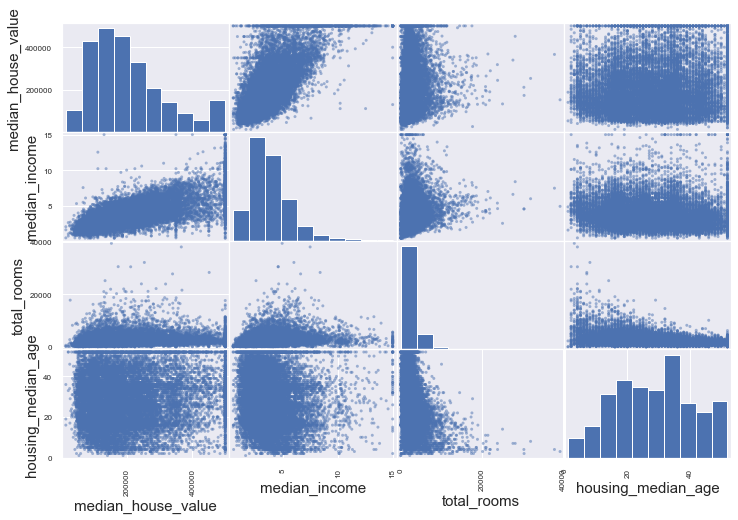

In [81]:
## using scatter_matrix 

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))

Text(0, 0.5, 'median house vallue')

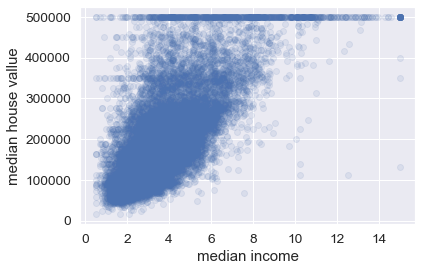

In [83]:
plt.scatter(x = 'median_income', y = 'median_house_value', data = housing, alpha = 0.1)
plt.xlabel('median income')
plt.ylabel('median house vallue')

In [13]:
# extracting the data without the dependent variable (median_house_value)
housing = strat_train_set.drop('median_house_value', axis = 1) 
labels = strat_train_set['median_house_value'].copy()

In [17]:
# impute the missing values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# delete the categorical variable
housing_num = housing.drop('ocean_proximity', axis = 1)

In [90]:
# fit then transform with the imputer 
imputer.fit(housing_num)
X = imputer.transform(housing_num) 

In [92]:
# X is an array we need to transform it to a DF named housing_tr
housing_tr = pd.DataFrame(X, columns=housing_num.columns , index = housing_num.index)

In [18]:
# create a housing_cat DF
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [99]:
# import the OneHotEncoder from the preprocessing
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [100]:
# transform the sparse matrix to the array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
### Create the Custom Transformer 

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            berdooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,berdooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [20]:
## scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler

In [21]:
######### Using all These Preceding Processes in Pipelines imputation then combineattr then scaling

from sklearn.pipeline import Pipeline

num_pipline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scl', StandardScaler())])

In [22]:
## try this pipeline 
housing_num_tr = num_pipline.fit_transform(housing_num)

In [23]:
# combine the num_pipline with the categorical estimator (OnecodeEncoder) into one Full_Pipline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attrs = list(housing_num)
cat_attrs = ['ocean_proximity']

full_pipline = ColumnTransformer([
    ('num', num_pipline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs)
])

housing_prepared = full_pipline.fit_transform(housing)

### Select and Train the Model

In [24]:
def display_scores(scores):
    print('scores: ', scores)
    print('mean_scores: ',scores.mean())
    print('std_scores: ', scores.std())

In [30]:
################### LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg =  LinearRegression()
lin_reg.fit(housing_prepared, labels)
lin_predictions = lin_reg.predict(housing_prepared)


### RMSE Evaluation
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(lin_predictions, labels)
lin_rmse = np.sqrt(lin_mse)
print('lin_rmse', lin_rmse)

lin_rmse 68628.19819848922


In [38]:
scores = cross_val_score(lin_reg, housing_prepared, labels, cv = 10, scoring = 'neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean_scores:  69052.46136345083
std_scores:  2731.674001798347


In [32]:
#### Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, labels)
tree_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(tree_predictions, labels)
tree_rmse = np.sqrt(tree_mse)
print('tree RMSE: ',tree_rmse)

tree RMSE:  0.0


In [34]:
## lets look at the Evaluation using cross validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, labels, cv = 10, scoring = 'neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)

[69672.42106761 66198.9454293  70989.40454321 68448.98003886
 69639.93906737 75220.928333   70720.17769472 71050.61126093
 77732.80054441 70702.92374328]


In [37]:
display_scores(tree_rmse_scores)

scores:  [69672.42106761 66198.9454293  70989.40454321 68448.98003886
 69639.93906737 75220.928333   70720.17769472 71050.61126093
 77732.80054441 70702.92374328]
mean_scores:  71037.71317226844
std_scores:  3105.992664398632


In [26]:
### Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared, labels)
rf_predictions = rf_reg.predict(housing_prepared)
rf_mse = mean_squared_error(rf_predictions, labels)
rf_rmse = np.sqrt(rf_mse)
print('RF rmse: ', rf_rmse)

RF rmse:  18672.028559758928


In [27]:
#### Random Forest with cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_reg, housing_prepared, labels, cv = 10, scoring = 'neg_mean_squared_error')
rf_scores_rmse = np.sqrt(-scores)
display_scores(rf_scores_rmse)

scores:  [49458.33564676 47400.31575618 50198.96954007 52097.77101655
 49632.94702765 53314.1624628  48341.36012907 47880.78876224
 53157.53785356 50110.89096706]
mean_scores:  50159.30791619603
std_scores:  1989.4995788525623


In [28]:
#### Fine Tune The Model with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg,param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score= True)
grid_search.fit(housing_prepared, labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [29]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [32]:
cvres = grid_search.cv_results_
cvres['params']

[{'max_features': 2, 'n_estimators': 3},
 {'max_features': 2, 'n_estimators': 10},
 {'max_features': 2, 'n_estimators': 30},
 {'max_features': 4, 'n_estimators': 3},
 {'max_features': 4, 'n_estimators': 10},
 {'max_features': 4, 'n_estimators': 30},
 {'max_features': 6, 'n_estimators': 3},
 {'max_features': 6, 'n_estimators': 10},
 {'max_features': 6, 'n_estimators': 30},
 {'max_features': 8, 'n_estimators': 3},
 {'max_features': 8, 'n_estimators': 10},
 {'max_features': 8, 'n_estimators': 30},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}]

In [34]:
cvres['mean_test_score']

array([-4.15237431e+09, -3.08974905e+09, -2.78317579e+09, -3.66241423e+09,
       -2.78775875e+09, -2.53551860e+09, -3.51071225e+09, -2.70393208e+09,
       -2.51859029e+09, -3.45353907e+09, -2.71941422e+09, -2.52662917e+09,
       -3.93853840e+09, -2.95250784e+09, -3.57455220e+09, -2.75950702e+09,
       -3.37297947e+09, -2.67136105e+09])

In [35]:
for scores, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-scores), params)

64438.91922698233 {'max_features': 2, 'n_estimators': 3}
55585.511156632245 {'max_features': 2, 'n_estimators': 10}
52755.81281208929 {'max_features': 2, 'n_estimators': 30}
60517.88352916854 {'max_features': 4, 'n_estimators': 3}
52799.230625129734 {'max_features': 4, 'n_estimators': 10}
50353.93327015495 {'max_features': 4, 'n_estimators': 30}
59251.26369702993 {'max_features': 6, 'n_estimators': 3}
51999.34695157667 {'max_features': 6, 'n_estimators': 10}
50185.55859787192 {'max_features': 6, 'n_estimators': 30}
58766.81942441471 {'max_features': 8, 'n_estimators': 3}
52148.00299623163 {'max_features': 8, 'n_estimators': 10}
50265.58634732416 {'max_features': 8, 'n_estimators': 30}
62757.775581459595 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54336.98408414045 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59787.55890787882 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52531.0100847012 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [36]:
### Analyze the Best Models and Their Errors

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.28703914e-02, 6.84240014e-02, 3.94745198e-02, 1.69981859e-02,
       1.69133536e-02, 1.82395749e-02, 1.70890116e-02, 3.05886744e-01,
       5.27428456e-02, 1.11508882e-01, 1.09551563e-01, 1.27658810e-02,
       1.47086792e-01, 1.17202678e-04, 3.23187602e-03, 7.09917371e-03])

In [47]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attrs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30588674443030045, 'median_income'),
 (0.14708679235333888, 'INLAND'),
 (0.11150888229406304, 'pop_per_hhold'),
 (0.10955156336574186, 'bedrooms_per_room'),
 (0.07287039141859473, 'longitude'),
 (0.06842400142180365, 'latitude'),
 (0.052742845561389806, 'rooms_per_hhold'),
 (0.039474519792457564, 'housing_median_age'),
 (0.018239574914717588, 'population'),
 (0.01708901156850667, 'households'),
 (0.016998185859472943, 'total_rooms'),
 (0.016913353589249433, 'total_bedrooms'),
 (0.01276588101485874, '<1H OCEAN'),
 (0.007099173714799554, 'NEAR OCEAN'),
 (0.0032318760222833243, 'NEAR BAY'),
 (0.0001172026784218162, 'ISLAND')]

In [54]:
final_model = grid_search.best_estimator_

In [55]:
### Evaluating the System on the test set
## choosing the best system



X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipline.fit_transform(X_test)


In [57]:
## directly we predict 

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error( y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

63537.1089509398

In [58]:
### CI

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([61617.5007019 , 65400.39781942])